In [1]:
import matplotlib.pyplot as plt
import facets_improc as ip
import numpy as np

#Median-cut algorithm to colour quantise image
#https://muthu.co/reducing-the-number-of-colors-of-an-image-using-median-cut-algorithm/
def find_max_range(red, green, blue):
    a = max(red)-min(red)
    b = max(green)-min(green)
    c = max(blue)-min(blue)
    if ((a >= b) and (a >= c)):
        return 0 
    if (b >= c):
        return 1
    return 2

def split_pixels(arg):
    red = arg[:,0]
    green = arg[:,1]
    blue = arg[:,2]
    sort_column = int(find_max_range(red, green, blue))
    arg = arg[arg[:,sort_column].argsort()[::-1]].copy()
    new = np.array_split(arg,2)
    return new

def get_colour_arrays(arg, n):
    b = split_pixels(arg)
    for x in range(1, n):
        a = b.copy()
        b = []
        for y in range(0, len(a)):
            b += split_pixels(a[y])
    return b

In [2]:
#### from https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering
#Floyd-Steinberg Dithering
def dither(img, colours):
    dithered = img.copy()
    new_pixel = [0,0,0]
    for y in range(1, len(img)-1):
        for x in range(1, len(img[0])-1):
            old_pixel = dithered[y,x].copy()
            new_pixel = min(colours, key=lambda a:sum(np.square(a-old_pixel)))
            dithered[y,x] = new_pixel
            error = old_pixel - new_pixel
            dithered[y,x+1] = dithered[y,x+1] + error * 7/16
            dithered[y+1,x-1] = dithered[y+1,x-1] + error * 3/16
            dithered[y+1,x] = dithered[y+1,x] + error * 5/16
            dithered[y+1,x+1] = dithered[y+1,x+1] + error * 1/16
    return dithered

This program takes an int n and quantizes image into 2^n colours
n = 4
The image will be quantised into 16 colours


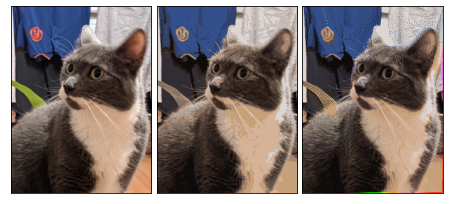

In [5]:
#generates 2^n colours complete 3 by median cut

img = ip.imread("cat.png") #take in image - You can replace link with whatever image you want

print("This program takes an int n and quantizes image into 2^n colours")
n = int(input("n = ")) #get input. n>0
print("The image will be quantised into " + str(2**n) + " colours")

#initialise lists
colour_arrays = []
colours = []
unrounded_colours = []
b = []

#get colours for color quantisition
arr = np.concatenate(img)
colour_arrays = get_colour_arrays(arr,n)
for x in range(0, len(colour_arrays)):
    colours.append(np.round(sum(colour_arrays[x])/len(colour_arrays[x])))

#get image that is just colour quantised
img_2 = img.copy()
for y in range(0, len(img_2)-1):
    for x in range(0, len(img_2[0])-1):
        img_2[y][x] = min(colours, key=lambda a:sum(np.square(a-img_2[y][x])))

#apply Floyd-Steinberg dithering
img_3 = dither(img, colours)

#display images
fig, ax = plt.subplots(1, 3)
plt.subplots_adjust(hspace=0.04, wspace=0.04, top=1, bottom=0, left=0, right=1)

plt.sca(ax[0])
ip.imshow(img, new_figure=False)

plt.sca(ax[1])
ip.imshow(img_2, new_figure=False)

plt.sca(ax[2])
ip.imshow(img_3, new_figure=False)